# Estudiante: Heiner Romero Leiva

In [1]:
import os
print(os.getcwd())
os.chdir("/Users/heinerleivagmail.com")

/Users/heinerleivagmail.com


In [2]:
# Importando librerias

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pandas.util.testing as tm

/Users/heinerleivagmail.com/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data = pd.read_csv("neuronal.csv", delimiter = ',', decimal ='.')

In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
print(data.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


## Exploratory Data Analysis

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


In [8]:
# Solo tenemos 3 variables numericas las demas son categoricas, algunas de ellas ordinales y las otras nominales. Ademas se puede apreciar como los datos no se encuentran en la misma escala, 
# por lo que sera necesario reescalarlos. 

In [9]:
# Inspeccionando Dataset en busca de NaN values
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
# Dataset no cuenta con 11 Nan Values, se van a reemaplzar por la mediana
data['TotalCharges'].median()

1397.475

In [11]:
data['TotalCharges'].fillna(1397.38, inplace = True)

In [12]:
# Inspeccionando de nuevo dataset y ya no hay valores nulos. 
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Construyendo graficos de pastel para analizar datos categoricos

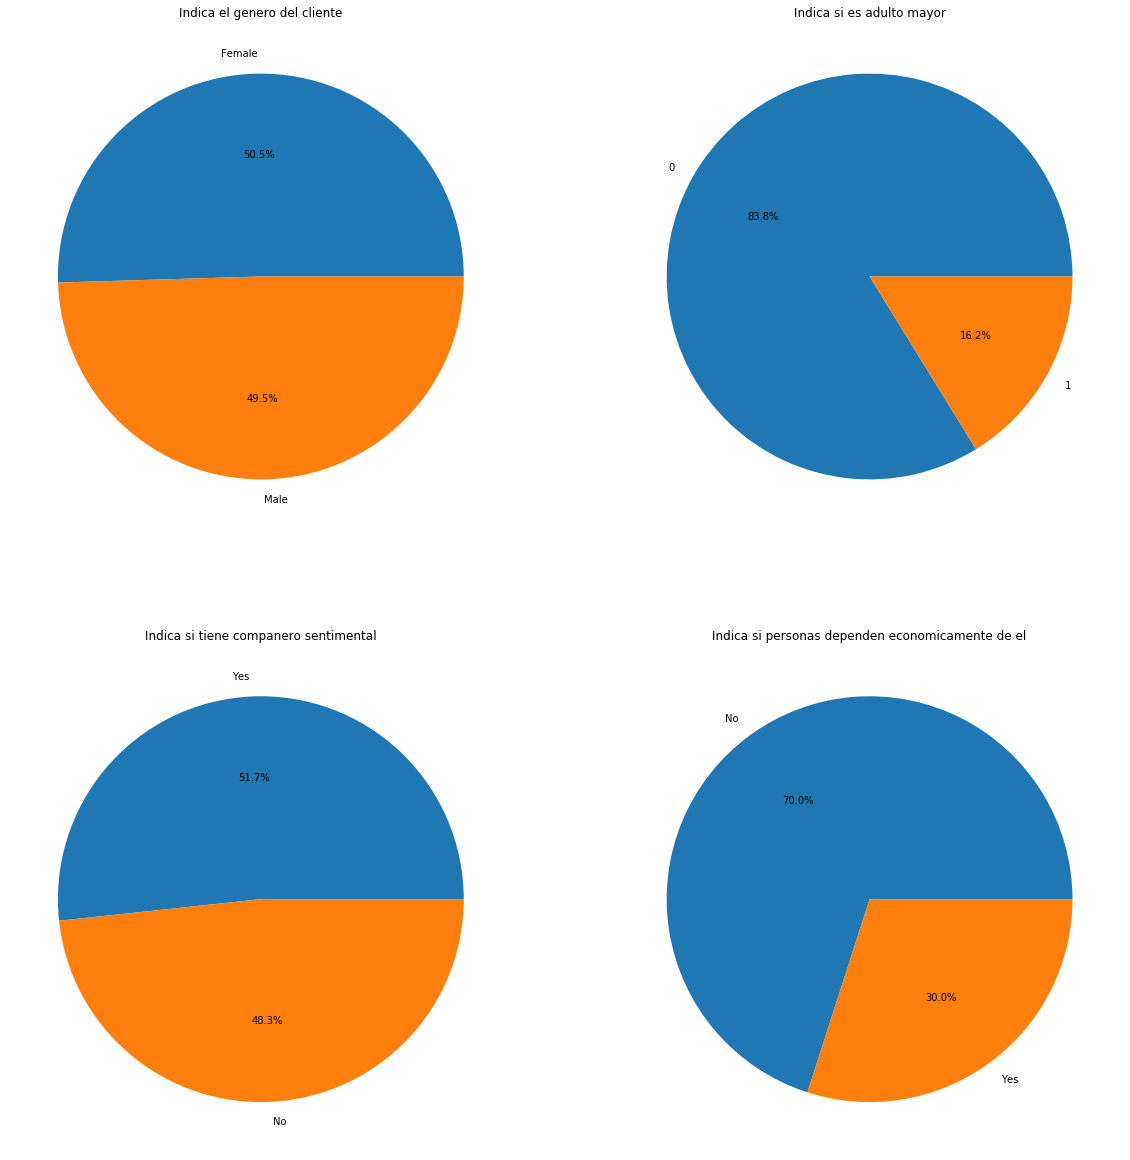

In [13]:
# Pie charts
f, ax = plt.subplots(figsize=(20, 21))

# Gender
plt.subplot(2, 2, 1)
plt.title("Indica el genero del cliente")
sums = data["gender"].value_counts()
labels = data["gender"].unique()
plt.pie(sums, labels=labels, autopct='%1.1f%%')


# SeniorCitizen
plt.subplot(2, 2, 2)
plt.title("Indica si es adulto mayor")
sums = data["SeniorCitizen"].value_counts()
labels = data["SeniorCitizen"].unique()
plt.pie(sums, labels=labels, autopct='%1.1f%%')

# Partner
plt.subplot(2, 2, 3)
plt.title("Indica si tiene companero sentimental")
sums = data["Partner"].value_counts()
labels = data["Partner"].unique()
plt.pie(sums, labels=labels, autopct='%1.1f%%')

# Dependents
plt.subplot(2, 2, 4)
plt.title("Indica si personas dependen economicamente de el")
sums = data["Dependents"].value_counts().tolist()
labels = data["Dependents"].unique()
plt.pie(sums, labels=labels, autopct='%1.1f%%')

plt.show()

### Analisis

Con estos primeros graficos de pastel se pueden ver mas detalles de los clientes:

* Gender: casi que se tiene el mismo porcentaje en cuanto al sexo, pero hay mas hombres clientes que mujeres por un 1%. 
* SeniorCitizen: lado la mayoria de clientes no son adultos mayores o no se encuentran pensionados; solo un 16.2% se encuentran en dicho segmento, el restante se encuentra en etapa productiva.
* Partner: un 51.7% asegura tener una pareja o estar en una relacion frente a un 48.3% que indica que se encuentran solos.
* Dependents: un 70% de los clientes indican que no tienen personas que dependen economicamente de ellos, versus un 30% que indica que si cuentan con personas dependientes. 

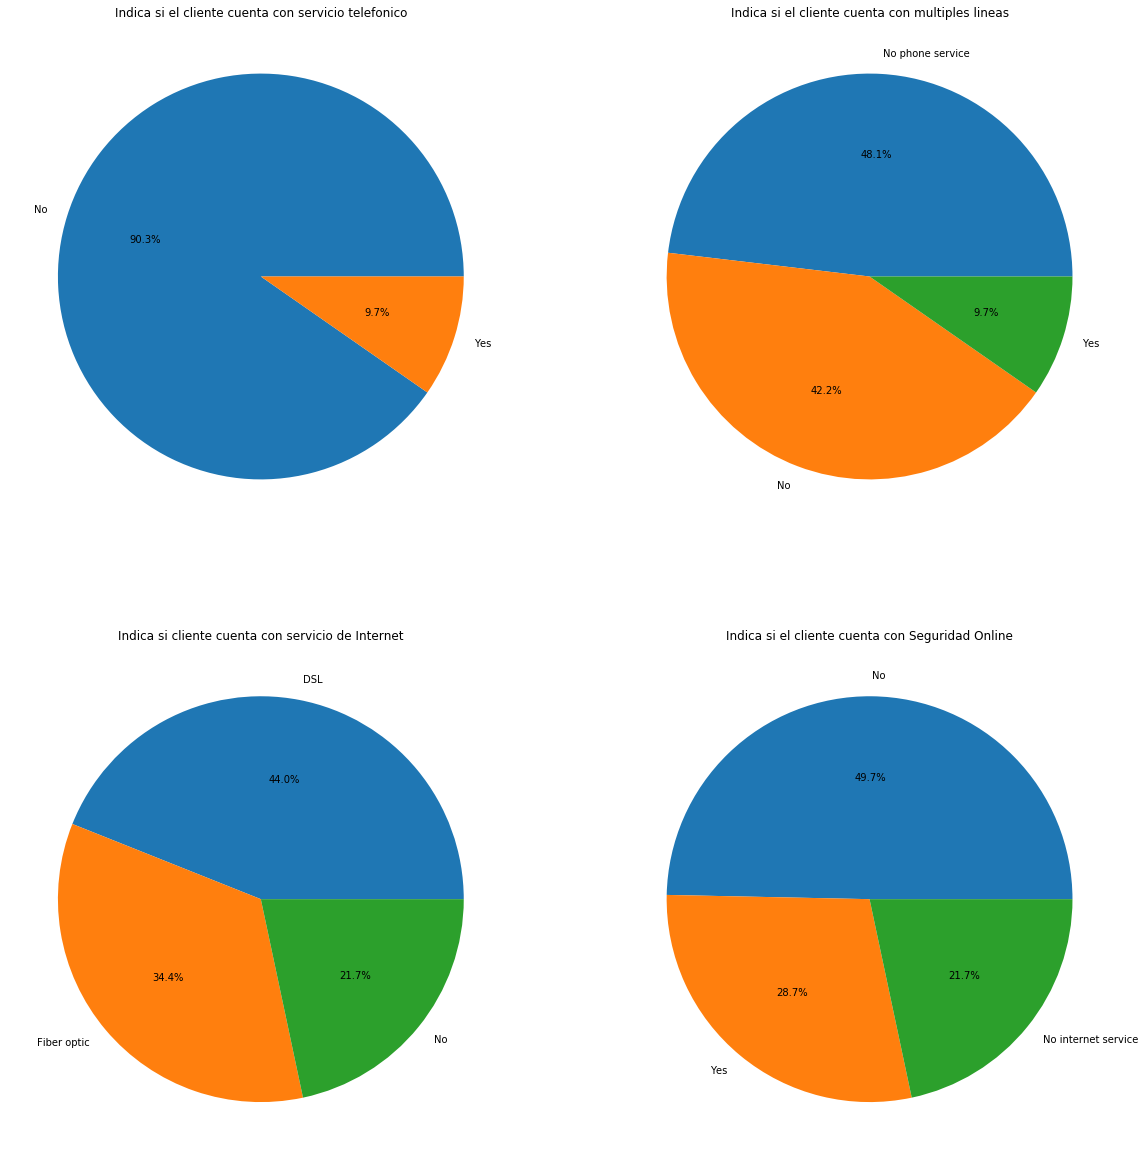

In [14]:
# Pie charts
f, ax = plt.subplots(figsize=(20, 21))

# PhoneService
plt.subplot(2, 2, 1)
plt.title("Indica si el cliente cuenta con servicio telefonico")
sums = data["PhoneService"].value_counts()
labels = data["PhoneService"].unique()
plt.pie(sums, labels=labels, autopct='%1.1f%%')


# MultipleLines
plt.subplot(2, 2, 2)
plt.title("Indica si el cliente cuenta con multiples lineas")
sums = data["MultipleLines"].value_counts()
labels = data["MultipleLines"].unique()
plt.pie(sums, labels=labels, autopct='%1.1f%%')

# InternetService
plt.subplot(2, 2, 3)
plt.title("Indica si cliente cuenta con servicio de Internet")
sums = data["InternetService"].value_counts()
labels = data["InternetService"].unique()
plt.pie(sums, labels=labels, autopct='%1.1f%%')

# OnlineSecurity
plt.subplot(2, 2, 4)
plt.title("Indica si el cliente cuenta con Seguridad Online")
sums = data["OnlineSecurity"].value_counts().tolist()
labels = data["OnlineSecurity"].unique()
plt.pie(sums, labels=labels, autopct='%1.1f%%')

plt.show()

### Analisis

* PhoneService: se puede apreciar como un 90.3% de los clientes no cuentan con servicio telefonico, frente a un 9.7% que si. 
* MultipleLines: un 48.1% indica que del todo no tiene servicio telefonico, un 42.4% dice que no tiene multiples lineas y solo un 9.7% dice que si tiene multiples lineas. Es curioso porque se puede apreciar que si se suman las personas que dicen no tener servicio telefonico como en el primer grafico cdon las que dicen que no tienen multiples lineas y que del todo no tienen servicio telefonico se obtiene el 90.3% que se vio de primero, lo cual indica que los que tienen multiples lineas no tienen asociado un servicio telefonico a ellos, sino otro servicio. 
* InternetService: indica que un 44% cuenta con internet DSL y una menor cantidad cuenta con Fibra Optica (34.4%), un 21.7% dice que no tiene servicio de internet. 
* OnlineSecurity: un 49.7% de los clientes asegura que no cuenta con seguridad online, mientras que un 28.7% dice que si cuenta con ella, un 21.7% indica que no cuentan con internet por lo que, seria innecesario contar con la misma; lo cual calza con el grafico anterior. 

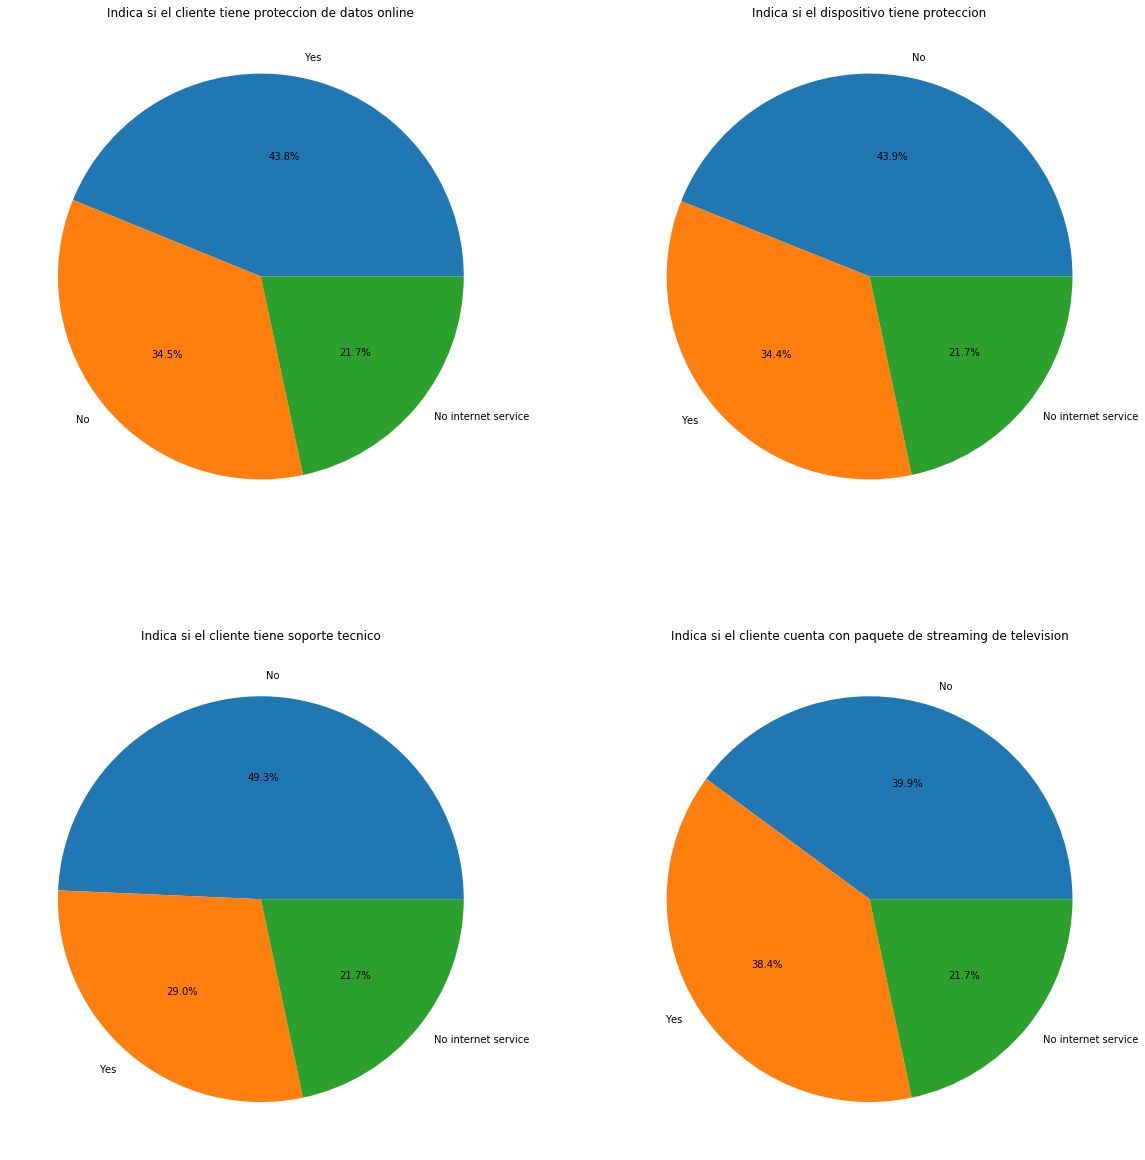

In [15]:
# Pie charts
f, ax = plt.subplots(figsize=(20, 21))

# OnlineBackup
plt.subplot(2, 2, 1)
plt.title("Indica si el cliente tiene proteccion de datos online")
sums = data["OnlineBackup"].value_counts()
labels = data["OnlineBackup"].unique()
plt.pie(sums, labels=labels, autopct='%1.1f%%')


# DeviceProtection
plt.subplot(2, 2, 2)
plt.title("Indica si el dispositivo tiene proteccion")
sums = data["DeviceProtection"].value_counts()
labels = data["DeviceProtection"].unique()
plt.pie(sums, labels=labels, autopct='%1.1f%%')

# TechSupport
plt.subplot(2, 2, 3)
plt.title("Indica si el cliente tiene soporte tecnico")
sums = data["TechSupport"].value_counts()
labels = data["TechSupport"].unique()
plt.pie(sums, labels=labels, autopct='%1.1f%%')

# StreamingTV
plt.subplot(2, 2, 4)
plt.title("Indica si el cliente cuenta con paquete de streaming de television")
sums = data["StreamingTV"].value_counts().tolist()
labels = data["StreamingTV"].unique()
plt.pie(sums, labels=labels, autopct='%1.1f%%')

plt.show()

### Analisis

* OnlineBackup: un 43.8% indica que si tiene un servicio de respaldo online (cloud) versus un 34.5% que no tiene ninguna clase de servicio, se sigue manteniendo el 21.7% de los suscriptores que no cuentan con internet. 
* DeviceProtection: un 43.9% asegura no tener su dispositivo con algun sistema de proteccion, un 34.4% asegura tenerlo protegido, y se sigue manteniendo el mismo porcentaje de los que no cuentan con internet. Ya que se puede ver que estos clientes no quieren contratar servicios de proteccion online o de sus dispositivos, pero si les gusta tener respaldos en la nube. 
* TechSupport: como era de esperar, un 49.3% de los clientes asegura no tener ningun servicio de soporte tecnico, porque muchos no tienen servicios de proteccion, y solo un 29% asegura tener este servicio. 
* StreamingTV: un 39.9% de los clientes no tiene ningun paquete de Streaming y un 38.4% asegura tenerlo. 

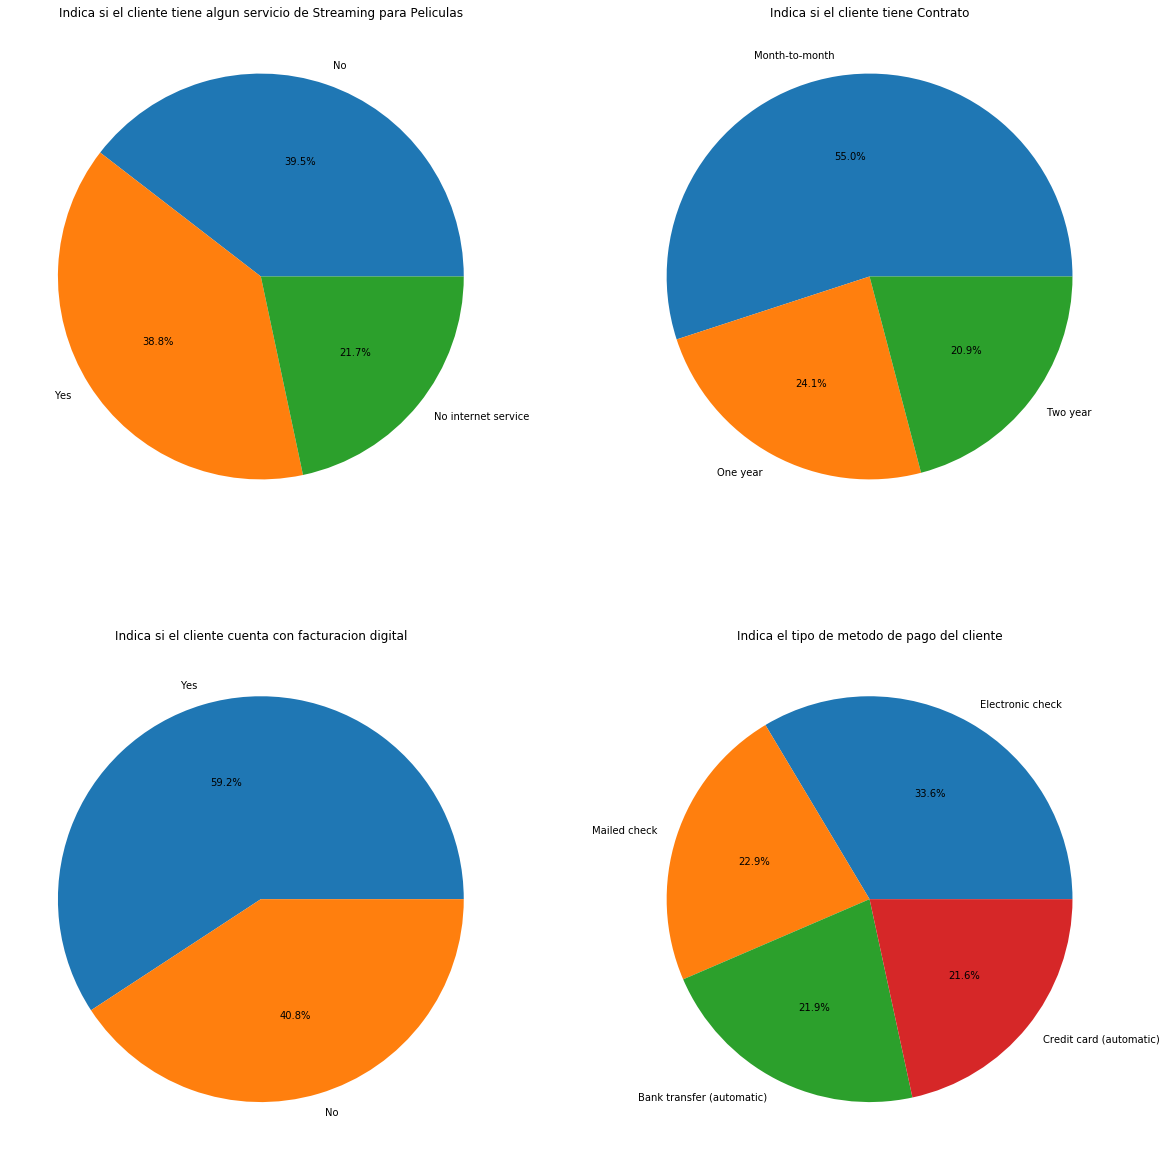

In [16]:
# Pie charts
f, ax = plt.subplots(figsize=(20, 21))

# StreamingMovies
plt.subplot(2, 2, 1)
plt.title("Indica si el cliente tiene algun servicio de Streaming para Peliculas")
sums = data["StreamingMovies"].value_counts()
labels = data["StreamingMovies"].unique()
plt.pie(sums, labels=labels, autopct='%1.1f%%')


# Contract
plt.subplot(2, 2, 2)
plt.title("Indica si el cliente tiene Contrato")
sums = data["Contract"].value_counts()
labels = data["Contract"].unique()
plt.pie(sums, labels=labels, autopct='%1.1f%%')

# PaperlessBilling
plt.subplot(2, 2, 3)
plt.title("Indica si el cliente cuenta con facturacion digital")
sums = data["PaperlessBilling"].value_counts()
labels = data["PaperlessBilling"].unique()
plt.pie(sums, labels=labels, autopct='%1.1f%%')

# PaymentMethod
plt.subplot(2, 2, 4)
plt.title("Indica el tipo de metodo de pago del cliente")
sums = data["PaymentMethod"].value_counts().tolist()
labels = data["PaymentMethod"].unique()
plt.pie(sums, labels=labels, autopct='%1.1f%%')

plt.show()

### Analisis:

* StreamingMovies: Un 39.5% indica que no tienen un servicio de streaming de peliculas, versus un 38.8% que indica que si lo tiene, es decir las personas que tienen un servicio de Streaming de TV tambien tienen uno de Peliculas. 
* Contract: un 55% de los clientes indica que pagan ekl servicio mes a mes, mientras que un 24.1% indica que tienen un contrato a un ano, y finalmente un 20.9% tienen un contrato a dos anos, esto debe despertarnos nuestra atencion, ya que la mayoria tienen contratos mes a mes, convirtiendolos en potenciales clientes que pueden en cualquier momento optar por abandonar el servicio de Telco.
* PaperlessBilling: un 59.2% sonb clientes que tienen factura electronica, mientras que un 40.8% indica recibir factura fisica. 
* PaymentMethod: por ultimo, un 33.6% pagan sus servicios mediante cheque electronico, un 22.9% paga sus servicios mediante un cheque enviado por correo, un 21.9% paga sus servicios mediante transferencia bancaria y finalmente un 21.6% paga su servicio mediante un debito automatico a su tarjeta de credito. Es decir la mayoria de los clientes prefieren canales mas tradicionales de pago que afiliar sus tarjetas o cuenta para ek debito automatico, lo que potencia que puedan dimitir el servicio en cualquier momento.  

In [17]:
# Hay que transformar a numéricas las variables categóricas para poder trabajar con ellas
data['SeniorCitizen']= data['SeniorCitizen'].astype('int') # esta variable ya esta convertida en 0 y 1, entonces solo se convertira a int

In [18]:
obj_df = data.select_dtypes(include=['object']).copy() # se eligen las variables categoricas (object)
print(obj_df.columns)

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
lb_encoder = LabelEncoder()
for col in obj_df.columns:
    data[col] = lb_encoder.fit_transform(data[col])

In [21]:
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1
5,6551,0,0,0,0,8,1,2,1,0,...,2,0,2,2,0,1,2,99.65,820.50,1
6,1002,1,0,0,1,22,1,2,1,0,...,0,0,2,0,0,1,1,89.10,1949.40,0
7,4770,0,0,0,0,10,0,1,0,2,...,0,0,0,0,0,0,3,29.75,301.90,0
8,5604,0,0,1,0,28,1,2,1,0,...,2,2,2,2,0,1,2,104.80,3046.05,1
9,4534,1,0,0,1,62,1,0,0,2,...,0,0,0,0,1,0,0,56.15,3487.95,0


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int64  
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


In [23]:
# Todas las variables se convirtieron a numericas y se puede trabajar con ellas

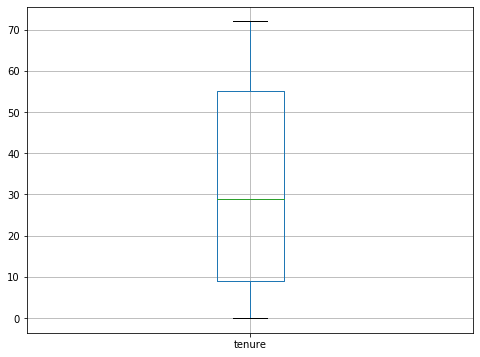

In [24]:
# Boxplots para las variables que eran numericas
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
data.boxplot(column='tenure', ax=ax);

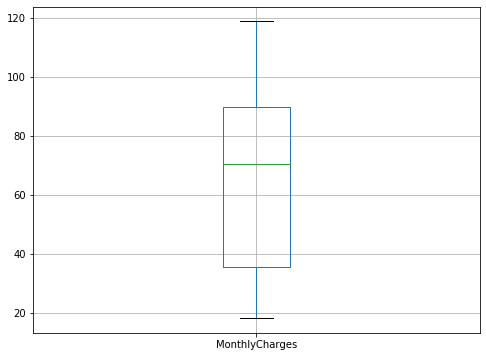

In [25]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
data.boxplot(column='MonthlyCharges', ax=ax);

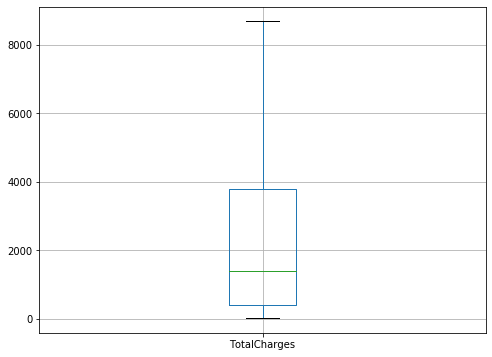

In [26]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
data.boxplot(column='TotalCharges', ax=ax);

### Analisis

Con respecto a los boxplots se observa que la variable tenure un 25% de los datos son iguales o menores a 10, mientras que un 75% son iguales o mayores a 55. 

La variable MonthlyCharges, muestra que un 50% de los cargos mensuales son iguales o menores a 55, y el mnayor de ellos es de 120. 

La variable TotalCharges muestra que un 50% de los datos son menores o iguales a 1800, y el mayor es mas de 8000, lo que, se ve que hay algunas desviaciones a la izquierda, sin embargo vamos a ver como se distribuyen los datos con un histograma. 

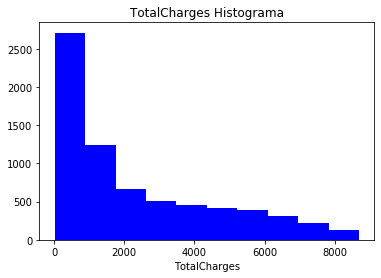

In [27]:
# TotalCharges Histogram
plt.hist(data['TotalCharges'], color = 'blue')
plt.title('TotalCharges Histograma')
plt.xlabel('TotalCharges');

In [28]:
# Como se habia predicho, la mayoria de las observaciones estan a la derecha, lo que causa desviaciones importantes a la izquierda y por lo que, los datos no se comportan de manera normal (binomial).
# Para tratar de ajustar los datos se van a tratar usando la mediana, ya que como no es una distribucion normal, para tratar de balancearlos. 

In [29]:
data['TotalCharges'].median()

1397.38

In [30]:
data['TotalCharges'] = [1397.475 if x > 2000 else x for x in data['TotalCharges']]

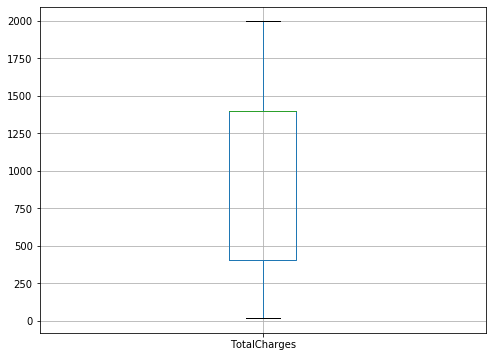

In [31]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
data.boxplot(column='TotalCharges', ax=ax);

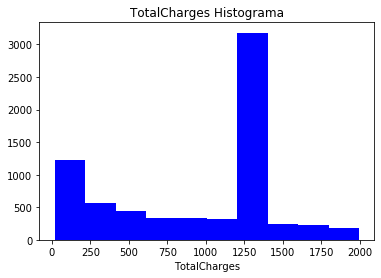

In [32]:
# TotalCharges Histogram
plt.hist(data['TotalCharges'], color = 'blue')
plt.title('TotalCharges Histograma')
plt.xlabel('TotalCharges');

In [33]:
# Los datos tienen un mejor aspecto ahora, y ya no se ve una disminucion tan dramatica, aunque siguen sin cumplir un patron binomial. 
# Por las demas variables numericas no se van a tratar, ya que distribuciones relativamente normales. 

## Seleccion de variables

In [34]:
print(data.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [35]:
# Se va proceder a hacer una matriz de correlaciones unicamnete con las variables categoricas ordinales y que sean binarias (solo 0 y 1) y con las numericas originales

In [36]:
data_num = data[['gender', 'SeniorCitizen', 'Partner', 'Dependents','tenure', 'PhoneService', 'InternetService', 'PaperlessBilling','MonthlyCharges', 'TotalCharges', 'Churn']]

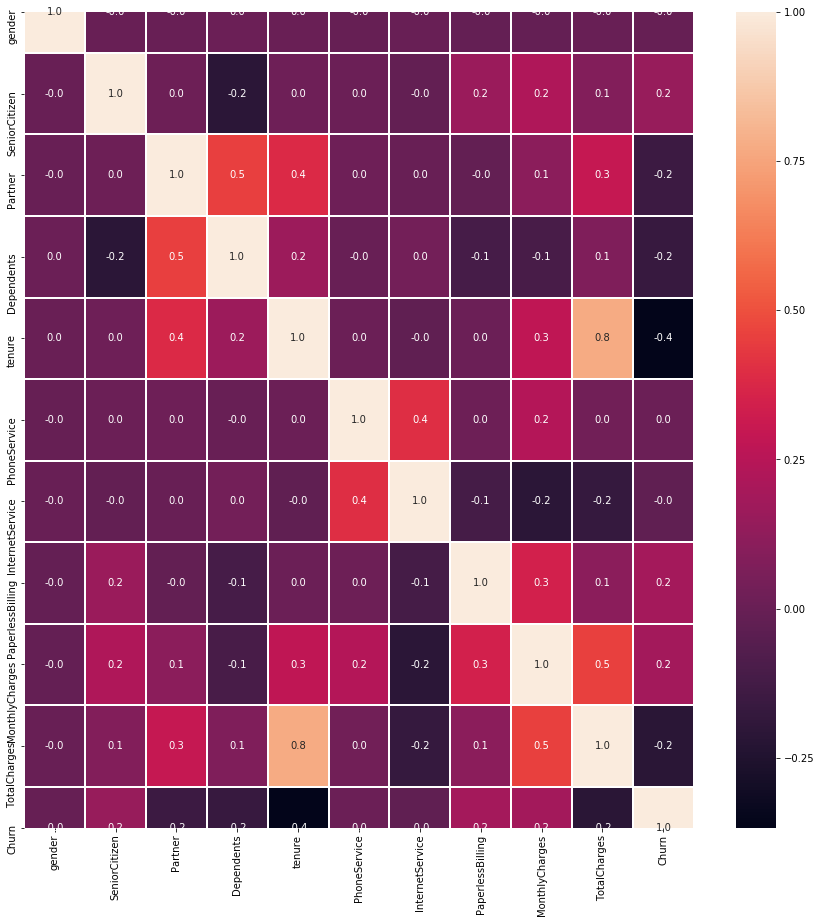

In [37]:
# Correlacion entre variables numericas y categoricas ordinales binarias
f,ax = plt.subplots(figsize=(15,15))
sns.heatmap(data_num.corr(method='spearman'),annot=True,fmt=".1f",linewidths=1,ax=ax)
plt.show()

### Analisis

Se ven fuertes correlaciones negativas entre la variable a predecir Churn y MonthlyCharges, asi como con Tenure, Dependents y Partner, lo que indica que si alguna de ellas disminuye, Churn va a aumentar y viceversa.
Hay otras variables que tienen correlaciones positivas como es el caso de PaperlessBilling, InternetService y SeniorCitizen, lo que indica que si una de las mencionadas aumenta, churn tambien aumentara y viceversa.

A nivel de las variables entre si, se ve que tenure y TotalCharges tienen correlaciones positivas muy fuertes, casi de 1, al igual que tenure y partner, asi como Dependents y partners.

SeniorCitizen presneta correlacion negativa con Dependents, al igual que InternetService y TotalCharges y MonthlyCharges. 

Por ultimo, TotalCharges y MonthlyCharges presentan altas correlaciones tambien, lo que hace que si una aumenta la otra tambien lo haga. 

Las demas variables presenten correlaciones muy bajas tanto negativas como positivas, por lo que, no se hara un analisis exhaustivo de ellas, porque no se ve necesario, dado al tan bajo nivel de correlacion. 


In [38]:
abs(data.corr()["Churn"])

customerID          0.017447
gender              0.008612
SeniorCitizen       0.150889
Partner             0.150448
Dependents          0.164221
tenure              0.352229
PhoneService        0.011942
MultipleLines       0.038037
InternetService     0.047291
OnlineSecurity      0.289309
OnlineBackup        0.195525
DeviceProtection    0.178134
TechSupport         0.282492
StreamingTV         0.036581
StreamingMovies     0.038492
Contract            0.396713
PaperlessBilling    0.191825
PaymentMethod       0.107062
MonthlyCharges      0.193356
TotalCharges        0.228477
Churn               1.000000
Name: Churn, dtype: float64

In [39]:
# Creando una matriz de correlaciones solamente con las variables numericas y con la de salida

In [40]:
numero = data[['tenure', 'MonthlyCharges',  'TotalCharges', 'Churn']]

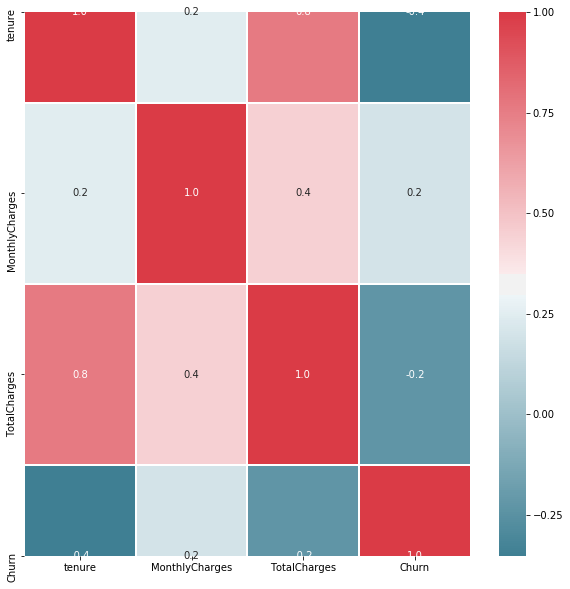

In [41]:
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(numero.corr(method='pearson'),cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True,fmt=".1f",linewidths=1,ax=ax)
plt.show()

# Analisis

Con esta matriz y solo tomando en cuenta datos numericos con la variable de salida, se observa que, TotalCharges, tenure y MonthlyCharges, todas tienen correlaciones ya sea positivas o negativas y la que tienen la correlacion mas marcada es Tenure. 

Entre estas mismas variables se observa que Tenure y TotalCharges cuentan con altas correlaciones, asi como TotalCharges y MonthlyCharges.


## ANOVA

In [42]:
import scipy.stats as stats

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int64  
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


In [44]:
print("Influencia del genero en abandonar la compania")
print(stats.f_oneway(data[data["gender"]==0]["Churn"], 
               data[data["gender"]==1]["Churn"]))
print()

print("Influencia de estar retirado en abandonar la compania")
print(stats.f_oneway(data[data["SeniorCitizen"]==0]["Churn"], 
               data[data["SeniorCitizen"]==1]["Churn"]))
print()


print("Influencia de estar con alguien en abandonar la compania")
print(stats.f_oneway(data[data["Partner"]==0]["Churn"], 
               data[data["Partner"]==1]["Churn"]))
print()


print("Influencia de tener a alguien dependiente en abandonar la compania")
print(stats.f_oneway(data[data["Dependents"]==0]["Churn"], 
               data[data["Dependents"]==1]["Churn"]))
print()


print("Influencia de tener servicio telefonico en abdonar la compania")
print(stats.f_oneway(data[data["PhoneService"]==0]["Churn"], 
               data[data["PhoneService"]==1]["Churn"]))
print()


print("Influencia de tener servicio de internet en abandonar la compania")
print(stats.f_oneway(data[data["InternetService"]==0]["Churn"], 
               data[data["InternetService"]==1]["Churn"]))
print()


print("Influencia de tener factura digital en abandonar la compania")
print(stats.f_oneway(data[data["PaperlessBilling"]==0]["Churn"], 
               data[data["PaperlessBilling"]==1]["Churn"]))
print()

Influencia del genero en abandonar la compania
F_onewayResult(statistic=0.5222569018402895, pvalue=0.4699045390966534)

Influencia de estar retirado en abandonar la compania
F_onewayResult(statistic=164.04142445613573, pvalue=3.839860055793829e-37)

Influencia de estar con alguien en abandonar la compania
F_onewayResult(statistic=163.06003598399533, pvalue=6.220731129635033e-37)

Influencia de tener a alguien dependiente en abandonar la compania
F_onewayResult(statistic=195.14931377324126, pvalue=9.140432989108222e-44)

Influencia de tener servicio telefonico en abdonar la compania
F_onewayResult(statistic=1.004266474792063, pvalue=0.31631478134436675)

Influencia de tener servicio de internet en abandonar la compania
F_onewayResult(statistic=350.09814353308536, pvalue=8.602536885732369e-76)

Influencia de tener factura digital en abandonar la compania
F_onewayResult(statistic=268.9852180928115, pvalue=2.3565543205872124e-59)



### Analisis

En este caso interesa comprobar si el p-valor obtenido es mayor que un valor de referencia de contraste para comprobar si existen diferencias significativas en la media de valores de ambos grupos y poder así analizar si los dos grupos de datos para una variable binaria obtienen, en este caso, calificaciones significativamente diferentes: Con un α=0.05α=0.05 y H0−>μ1=μ2=...=μnH0−>μ1=μ2=...=μn
* Si p-valor < 0.05 -> se rechaza H0 y por tanto hay diferencias entre los grupos
* Si p-valor >= 0.05 -> no se rechaza H0

Analizando los resultados anteriores se puede ver que los dos casos en los que más se ven las diferencias entre grupos (donde hay un p-valor menor) es en el caso de:

* SeniorCitizen
* Partner
* Dependents
* InternetService
* PaperlessBilling

Por lo que, resultado de lo anterior, seran variables necesarias para considerar en el analisis. 

In [45]:
# Hay varias variables que son categoricas pero no binarias, por lo que, se usara el test de Tukey para comprobar sus resultados. 

### Test de Tukey

In [46]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.stats.multicomp as multi

In [47]:
# Influencia de tener Multiples lineas
x = data["MultipleLines"]
y = data["Churn"]

mcDate = multi.MultiComparison(y,x)
Results = mcDate.tukeyhsd()
print("Influencia de tener Multiples lineas")
print(Results)

Influencia de tener Multiples lineas
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1  -0.0012    0.9 -0.0446 0.0422  False
     0      2   0.0357 0.0037  0.0097 0.0617   True
     1      2   0.0368  0.121 -0.0071 0.0808  False
---------------------------------------------------


In [48]:
# Influencia de tener OnlineSecurity
x = data["OnlineSecurity"]
y = data["Churn"]

mcDate = multi.MultiComparison(y,x)
Results = mcDate.tukeyhsd()
print("Influencia de tener OnlineSecurity")
print(Results)

Influencia de tener OnlineSecurity
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1  -0.3436 0.001 -0.3734 -0.3138   True
     0      2  -0.2716 0.001 -0.2987 -0.2444   True
     1      2   0.0721 0.001  0.0391   0.105   True
---------------------------------------------------


In [49]:
# Influencia de tener OnlineBackup
x = data["OnlineBackup"]
y = data["Churn"]

mcDate = multi.MultiComparison(y,x)
Results = mcDate.tukeyhsd()
print("Influencia de tener OnlineBackup")
print(Results)

Influencia de tener OnlineBackup
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1  -0.3252 0.001 -0.3562 -0.2943   True
     0      2   -0.184 0.001 -0.2108 -0.1571   True
     1      2   0.1413 0.001  0.1089  0.1736   True
---------------------------------------------------


In [50]:
# Influencia de tener DeviceProtection
x = data["DeviceProtection"]
y = data["Churn"]

mcDate = multi.MultiComparison(y,x)
Results = mcDate.tukeyhsd()
print("Influencia de tener DeviceProtection")
print(Results)

Influencia de tener DeviceProtection
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1  -0.3172 0.001 -0.3483 -0.2862   True
     0      2  -0.1663 0.001 -0.1932 -0.1393   True
     1      2    0.151 0.001  0.1185  0.1834   True
---------------------------------------------------


In [51]:
# Influencia de tener TechSupport
x = data["TechSupport"]
y = data["Churn"]

mcDate = multi.MultiComparison(y,x)
Results = mcDate.tukeyhsd()
print("Influencia de tener TechSupport")
print(Results)

Influencia de tener TechSupport
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1  -0.3423 0.001 -0.3722 -0.3124   True
     0      2  -0.2647 0.001 -0.2918 -0.2376   True
     1      2   0.0776 0.001  0.0447  0.1105   True
---------------------------------------------------


In [52]:
# Influencia de tener StreamingTV
x = data["StreamingTV"]
y = data["Churn"]

mcDate = multi.MultiComparison(y,x)
Results = mcDate.tukeyhsd()
print("Influencia de tener StreamingTV")
print(Results)

Influencia de tener StreamingTV
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1  -0.2612 0.001 -0.2932 -0.2291   True
     0      2  -0.0345 0.008 -0.0617 -0.0074   True
     1      2   0.2267 0.001  0.1944  0.2589   True
---------------------------------------------------


In [53]:
# Influencia de tener StreamingMovies
x = data["StreamingMovies"]
y = data["Churn"]

mcDate = multi.MultiComparison(y,x)
Results = mcDate.tukeyhsd()
print("Influencia de tener StreamingMovies")
print(Results)

Influencia de tener StreamingMovies
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -0.2628  0.001 -0.2948 -0.2307   True
     0      2  -0.0374 0.0035 -0.0645 -0.0103   True
     1      2   0.2254  0.001  0.1932  0.2576   True
----------------------------------------------------


In [54]:
# Influencia de tener Contract
x = data["Contract"]
y = data["Churn"]

mcDate = multi.MultiComparison(y,x)
Results = mcDate.tukeyhsd()
print("Influencia de tener Contract")
print(Results)

Influencia de tener Contract
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1  -0.3144 0.001 -0.3433 -0.2855   True
     0      2  -0.3988 0.001 -0.4263 -0.3713   True
     1      2  -0.0844 0.001  -0.118 -0.0507   True
---------------------------------------------------


In [55]:
# Influencia del PaymentMethod
x = data["PaymentMethod"]
y = data["Churn"]

mcDate = multi.MultiComparison(y,x)
Results = mcDate.tukeyhsd()
print("Influencia del PaymentMethod")
print(Results)

Influencia del PaymentMethod
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -0.0147 0.7436 -0.0537  0.0244  False
     0      2   0.2858  0.001  0.2504  0.3211   True
     0      3    0.024   0.38 -0.0145  0.0625  False
     1      2   0.3004  0.001  0.2649   0.336   True
     1      3   0.0386 0.0501    -0.0  0.0773  False
     2      3  -0.2618  0.001 -0.2967 -0.2269   True
----------------------------------------------------


### Analisis:

Con todas las variables analizadas se puede ver como la hipotesis nula se puede rechazar, por lo que con estas variables, es necesario trabajar:
    
    * MultipleLines
    * OnlineSecurity
    * OnlineBackup
    * DeviceProtection
    * TechSupport
    * StreamingTV
    * StreamingMovies
    * Contract
    * PaymentMethod

# Seleccion de variables: 

Habiendo hecho los analisis anteriores, se identificaron varias variables con las que era necesario trabajar, por lo que, se trabajara con:

* MultipleLines
* OnlineSecurity
* OnlineBackup
* DeviceProtection
* TechSupport
* StreamingTV
* StreamingMovies
* Contract
* PaymentMethod
* SeniorCitizen
* Partner
* Dependents
* InternetService
* PaperlessBilling
* CustomerID
* MonthlyCharges


No se toman en cuenta a Tenure por el grado tan alto de correlacion que tiene con Churn y con TotalCharges y MonthlyCharges. Gender con las pruebas de hipotesis, asi como PhoneService dieron resultados mayores a 0.05, entonces aceptan la hipotesis nula y no se van a considerar. TotalCharges tampoco se va a considerar dada la alta relacion con MonthlyCharges y esta a su vez con Churn. 

In [56]:
print(data.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [57]:
# Haciendo eleccion de variables 
dataset = data[['customerID', 'SeniorCitizen', 'Partner', 'Dependents',  'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod', 'MonthlyCharges']]

In [58]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   MultipleLines     7043 non-null   int64  
 5   InternetService   7043 non-null   int64  
 6   OnlineSecurity    7043 non-null   int64  
 7   OnlineBackup      7043 non-null   int64  
 8   DeviceProtection  7043 non-null   int64  
 9   TechSupport       7043 non-null   int64  
 10  StreamingTV       7043 non-null   int64  
 11  StreamingMovies   7043 non-null   int64  
 12  Contract          7043 non-null   int64  
 13  PaperlessBilling  7043 non-null   int64  
 14  PaymentMethod     7043 non-null   int64  
 15  MonthlyCharges    7043 non-null   float64
dtypes: float64(1), int64(15)
memory usage: 880

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame
from matplotlib import colors as mcolors

Using TensorFlow backend.


### Función para calcular los índices de calidad de la predicción

In [60]:
def indices_general(MC, nombres = None):
    precision_global = np.sum(MC.diagonal()) / np.sum(MC)
    error_global = 1 - precision_global
    precision_categoria  = pd.DataFrame(MC.diagonal()/np.sum(MC,axis = 1)).T
    if nombres!=None:
        precision_categoria.columns = nombres
    return {"Matriz de Confusión":MC, 
            "Precisión Global":precision_global, 
            "Error Global":error_global, 
            "Precisión por categoría":precision_categoria}

### Función para graficar la distribución de la variable a predecir

In [61]:
def distribucion_variable_predecir(data:DataFrame,variable_predict:str):
    colors = list(dict(**mcolors.CSS4_COLORS))
    df = pd.crosstab(index=data[variable_predict],columns="valor") / data[variable_predict].count()
    fig = plt.figure(figsize=(10,9))
    g = fig.add_subplot(111)
    countv = 0
    titulo = "Distribución de la variable %s" % variable_predict
    for i in range(df.shape[0]):
        g.barh(1,df.iloc[i],left = countv, align='center',color=colors[11+i],label= df.iloc[i].name)
        countv = countv + df.iloc[i]
    vals = g.get_xticks()
    g.set_xlim(0,1)
    g.set_yticklabels("")
    g.set_title(titulo)
    g.set_ylabel(variable_predict)
    g.set_xticklabels(['{:.0%}'.format(x) for x in vals])
    countv = 0 
    for v in df.iloc[:,0]:
        g.text(np.mean([countv,countv+v]) - 0.03, 1 , '{:.1%}'.format(v), color='black', fontweight='bold')
        countv = countv + v
    g.legend(loc='upper center', bbox_to_anchor=(1.08, 1), shadow=True, ncol=1)

### Función para ver la distribución de una variable categórica respecto a la predecir

In [62]:
def poder_predictivo_categorica(data:DataFrame, var:str, variable_predict:str):
    df = pd.crosstab(index= data[var],columns=data[variable_predict])
    df = df.div(df.sum(axis=1),axis=0)
    titulo = "Distribución de la variable %s según la variable %s" % (var,variable_predict)
    g = df.plot(kind='barh',stacked=True,legend = True, figsize = (10,9), \
                xlim = (0,1),title = titulo, width = 0.8)
    vals = g.get_xticks()
    g.set_xticklabels(['{:.0%}'.format(x) for x in vals])
    g.legend(loc='upper center', bbox_to_anchor=(1.08, 1), shadow=True, ncol=1)
    for bars in g.containers:
        plt.setp(bars, width=.9)
    for i in range(df.shape[0]):
        countv = 0 
        for v in df.iloc[i]:
            g.text(np.mean([countv,countv+v]) - 0.03, i , '{:.1%}'.format(v), color='black', fontweight='bold')
            countv = countv + v

### Función para ver la distribución de una variable numérica respecto a la predecir

In [63]:
def poder_predictivo_numerica(data:DataFrame, var:str, variable_predict:str):
    sns.FacetGrid(data, hue=variable_predict, height=6).map(sns.kdeplot, var, shade=True).add_legend()

### Distribucion de la variable a predecir

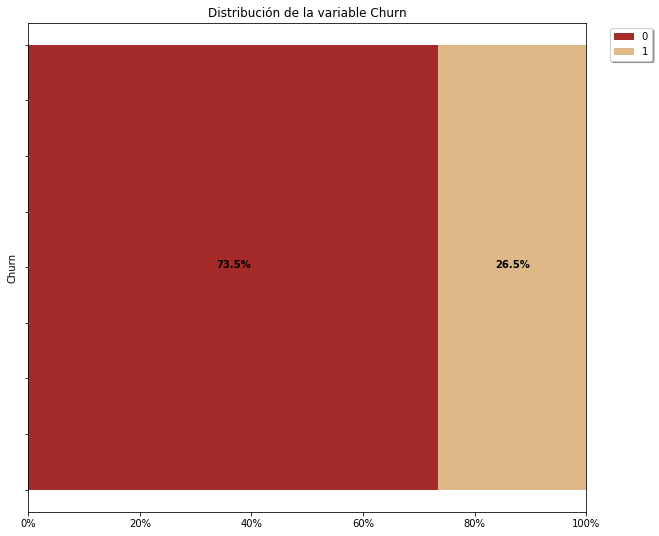

In [64]:
distribucion_variable_predecir(data,"Churn") #Problema altamente desequilibrado. 

In [65]:
# Normalizando y centrando la tabla ya que hay valores en diferentes escalas
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_values = scaler.fit_transform(dataset) 
dataset.loc[:,:] = scaled_values
dataset.head()

# Variables con escalas diferentes han sido reescaladas.

/Users/heinerleivagmail.com/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,customerID,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,0.911890,-0.439916,1.034530,-0.654012,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323
1,0.216906,-0.439916,-0.966622,-0.654012,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629
2,-0.470701,-0.439916,-0.966622,-0.654012,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660
3,0.990587,-0.439916,-0.966622,-0.654012,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535
4,1.470632,-0.439916,-0.966622,-0.654012,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365


### Elimina la variable catégorica, deja las variables predictoras en X

In [66]:
X = dataset.iloc[:,0:16] 
X.head()

,customerID,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,0.911890,-0.439916,1.034530,-0.654012,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323
1,0.216906,-0.439916,-0.966622,-0.654012,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629
2,-0.470701,-0.439916,-0.966622,-0.654012,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660
3,0.990587,-0.439916,-0.966622,-0.654012,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535
4,1.470632,-0.439916,-0.966622,-0.654012,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365


### Deja la variable a predecir en y


### Como la variable a predecir la dan en terminos de 0 y 1, es necesario con vertirla a Si y No.

In [67]:
import pandas as pd
d = data
df = pd.DataFrame(data=d)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.850,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.500,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.150,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.750,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.650,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.80,1990.500,0
7039,1525,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.20,1397.475,0
7040,3367,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.60,346.450,0
7041,5934,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,306.600,1


In [68]:
df.replace({0: "No", 1: "Si"}, inplace = True)
print(df.iloc[:,20:21]) #Resultado fue reemplazado con exito.

     Churn
0       No
1       No
2       Si
3       No
4       Si
...    ...
7038    No
7039    No
7040    No
7041    Si
7042    No

[7043 rows x 1 columns]


In [69]:
y = df.iloc[:,20:21] 
y.head()

,Churn
0,No
1,No
2,Si
3,No
4,Si


### Se separan los datos con el 70% de los datos para entrenamiento y el 30% para testing

Como la variable a predecir ya viene dada por "0" y "1" no es necesario utilizar codigo disyuntivo ni reescalar

In [70]:
dummy_y = pd.get_dummies(y)
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_X  = pd.DataFrame(scaler.fit_transform(X), columns = list(X))
X_train, X_test, y_train, y_test = train_test_split(scaled_X, dummy_y, train_size = 0.7, random_state = 0)
print(dummy_y)

      Churn_No  Churn_Si
0            1         0
1            1         0
2            0         1
3            1         0
4            0         1
...        ...       ...
7038         1         0
7039         1         0
7040         1         0
7041         0         1
7042         1         0

[7043 rows x 2 columns]


### Creando Modelo en Keras

In [71]:
model = Sequential()
model.add(Dense(300, input_dim = 16, activation = 'relu'))  # primera capa oculta con 300 neuronas
model.add(Dense(50, activation = 'sigmoid'))  # segunda capa oculta con 50 neuronas
model.add(Dense(30, activation = 'sigmoid'))  # tercera capa oculta con 30 neuronas
model.add(Dense(20, activation = 'relu'))  # Agregamos cuarta capa oculta con 20 neuronas
model.add(Dense(2, activation = 'softmax')) # Agregamos capa output con 2 neuronas

### Compilando Modelo

In [72]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

### Resumen del Modelo

In [73]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 300)               5100      
_________________________________________________________________
dense_2 (Dense)              (None, 50)                15050     
_________________________________________________________________
dense_3 (Dense)              (None, 30)                1530      
_________________________________________________________________
dense_4 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 42        
Total params: 22,342
Trainable params: 22,342
Non-trainable params: 0
_________________________________________________________________
None


### Ajustes del Modelo

### Usando 1000 etapas de entrenamiento (epochs) y actualizando los pesos de la red cada 50 observaciones procesadas (batch_size).

In [74]:
model.fit(X_train, y_train, epochs = 1000, batch_size = 50, verbose = 0)
# La predicción es una matriz con 3 columnas
y_pred = model.predict(X_test)
# Convertimos a columna
y_test_class = np.argmax(np.asanyarray(y_test), axis = 1)  # Convertimos a array
y_pred_class = np.argmax(y_pred, axis = 1)

### Predicciones y Calidad del Modelo

In [75]:
scores = model.evaluate(X_test, y_test)
MC = confusion_matrix(y_test_class, y_pred_class)
indices = indices_general(MC,list(np.unique(y)))
for k in indices:
    print("\n%s:\n%s"%(k,str(indices[k])))

2113/2113 [==============================] - 0s 44us/step

Matriz de Confusión:
[[1295  265]
 [ 298  255]]

Precisión Global:
0.7335541883577852

Error Global:
0.2664458116422148

Precisión por categoría:
         No        Si
0  0.830128  0.461121


### Validacion Cruzada

In [84]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# funcion para crear el modelo, requerido por KerasClassifier
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim = 16, activation = 'relu'))  # primera capa oculta con 300 neuronas
    model.add(Dense(8, activation = 'sigmoid'))  # segunda capa oculta con 50 neuronas
    model.add(Dense(1, activation = 'sigmoid'))  # tercera capa oculta con 30 neuronas
  # Compila el modelo
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Fija las semillas aleatorias para la reproducibilidad
import numpy
seed = 7
numpy.random.seed(seed)

# split para la variables predictoras (X) y a predecir (y)
X = dataset.iloc[:,0:16] 
Y = data.iloc[:,20:21]

# crea el modelo
model = KerasClassifier(build_fn=create_model, epochs=1000, batch_size=50, verbose=0)

# evalua usando 5 - fold validacion cruzada
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

# Asignando variable para grafico
res_keras = results.mean()

0.7647332191467285


### Curva ROC

### Funcion para graficar la Curva ROC

In [88]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In [89]:
def plotROC(real, prediccion, color = "red", label = None):
    fp_r, tp_r, umbral = roc_curve(real, prediccion)
    plt.plot(fp_r, tp_r, lw = 1, color = color, label = label)
    plt.plot([0, 1], [0, 1], lw = 1, color = "black")
    plt.xlabel("Tasa de Falsos Positivos")
    plt.ylabel("Tasa de Verdaderos Positivos")
    plt.title("Curva ROC")

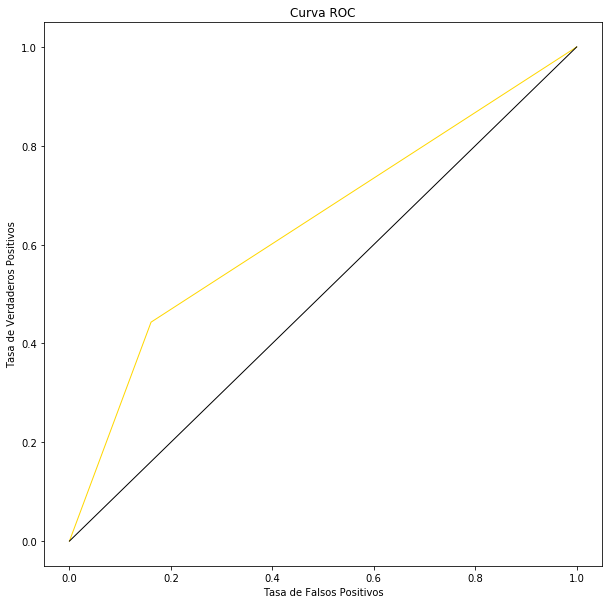

In [90]:
# Definiendo Modelo
model = Sequential()
model.add(Dense(300, input_dim = 16, activation = 'relu'))  # primera capa oculta con 300 neuronas
model.add(Dense(50, activation = 'sigmoid'))  # segunda capa oculta con 50 neuronas
model.add(Dense(30, activation = 'sigmoid'))  # tercera capa oculta con 30 neuronas
model.add(Dense(20, activation = 'relu'))  # Agregamos cuarta capa oculta con 20 neuronas
model.add(Dense(2, activation = 'softmax')) # Agregamos capa output con 2 neuronas
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])  
model.fit(X_train, y_train, epochs = 1000, batch_size = 50, verbose = 0)
# La predicción es una matriz con 3 columnas
y_pred = model.predict(X_test)
# Convertimos a columna
y_test_class = np.argmax(np.asanyarray(y_test), axis = 1)  # Convertimos a array
y_pred_class = np.argmax(y_pred, axis = 1)
# Genera la Curva ROC para Redes Neuronales usando paquete Keras
plt.figure(figsize=(10,10))
plotROC(y_test_class, y_pred_class, color = "gold")

In [91]:
Keras = roc_auc_score(y_test_class, y_pred_class)
print("Área bajo la curva ROC en Redes Neuronales Paquete Keras: {:.3f}".format(Keras))

Área bajo la curva ROC en Redes Neuronales Paquete Keras: 0.641


### Analisis General del Modelo

### En cuanto al modelo, se puede ver que dado a que la variable a predecir esta desbalanceada, las predicciones del No son mejores que las del Si, y para el modelo se tiene una precision gloabl de mas de un 73%, y una por categoria del Si, de un 46% y del No de un 83%. La validacion cruzada da una media de mas de 76% mientras que la Cu